In [1]:
# Exploratory analysis 

In [2]:
#import the libs and data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
df_2015=pd.read_csv('energy/2015-building-energy-benchmarking.csv')
df_2016=pd.read_csv('energy/2016-building-energy-benchmarking.csv')

In [3]:
# sort the columns 
df_2015 = df_2015.reindex(sorted(df_2015.columns), axis=1 )
df_2016 = df_2016.reindex(sorted(df_2016.columns), axis=1 )

In [4]:
#common columns 
a = np.intersect1d(df_2015.columns, df_2016.columns)
a

array(['BuildingType', 'ComplianceStatus', 'CouncilDistrictCode',
       'DataYear', 'DefaultData', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'Electricity(kWh)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ListOfAllPropertyUseTypes',
       'NaturalGas(kBtu)', 'NaturalGas(therms)', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'OSEBuildingID', 'Outlier',
       'PrimaryPropertyType', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'PropertyGFATotal', 'PropertyName',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)',
       'TaxParcelIdentificationNumber', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearBuilt',
       'YearsENERGYSTARCertified'], dtype=object)

In [5]:
#unique in 2015
for i in df_2015.columns:
    if i not in a:
        print(i)

2010 Census Tracts
City Council Districts
Comment
GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)
Location
OtherFuelUse(kBtu)
SPD Beats
Seattle Police Department Micro Community Policing Plan Areas
Zip Codes


In [6]:
#unique in 2016
for i in df_2016.columns:
    if i not in a:
        print(i)

Address
City
Comments
GHGEmissionsIntensity
Latitude
Longitude
State
TotalGHGEmissions
ZipCode


In [7]:
#rename the columns in 2016
df_2016.rename(columns={'Comments':'Comment','ZipCode':'Zip Codes','GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)'} , inplace=True)

In [8]:
# concatenation
df = pd.concat([df_2015,df_2016],ignore_index=True)

In [9]:
# drop duplicates and filter out the data 

df.drop_duplicates(inplace = True)
df = df[df['BuildingType']=='NonResidential']

# convert inf
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [10]:
print(df.shape)

(2921, 53)


In [89]:
#divide into x and y
#divide the data into numerical and categorical type 
df_num = df.select_dtypes(np.number)
df_y =  df_num[['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']]
dfx_num = df_num.drop(df_y , axis = 1)
dfx_obj = df.select_dtypes('object')

In [90]:
dfx_num.describe()

,2010 Census Tracts,City Council Districts,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),...,SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,YearBuilt,Zip Codes,Latitude,Longitude,TotalGHGEmissions
count,75.000000,70.000000,2921.000000,2921.000000,2008.000000,2.918000e+03,2.918000e+03,2.854000e+03,2.918000e+03,2.918000e+03,...,2.917000e+03,2918.000000,2918.000000,2.918000e+03,617.000000,2921.000000,2921.000000,1460.000000,1460.000000,1458.000000
mean,124.320000,1.271429,4.429647,2015.499829,63.159363,5.482067e+06,1.606669e+06,9.004264e+04,1.651064e+06,1.651064e+04,...,7.782377e+06,179.475977,182.177724,5.034305e+05,13727.159155,1960.471072,58431.625813,47.616115,-122.333457,166.340947
std,5.609259,0.447907,2.194466,0.500086,29.002405,1.331068e+07,3.901057e+06,1.562340e+05,5.591221e+06,5.591221e+04,...,1.913958e+07,187.221026,187.015117,5.326309e+06,28748.406678,32.934554,39680.453240,0.046616,0.023011,586.106337
min,116.000000,1.000000,1.000000,2015.000000,1.000000,-1.154170e+05,-3.382680e+04,5.656000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,-2.000000,-2.100000,0.000000e+00,0.000000,1900.000000,17916.000000,47.509590,-122.411820,-0.800000
25%,122.000000,1.000000,2.000000,2015.000000,43.000000,6.977925e+05,2.045092e+05,2.500000e+04,0.000000e+00,0.000000e+00,...,1.259282e+06,76.099999,79.925000,0.000000e+00,2836.000000,1929.000000,18390.000000,47.587855,-122.342335,18.912500
50%,123.000000,1.000000,4.000000,2015.000000,70.000000,1.644132e+06,4.818475e+05,4.132400e+04,4.049130e+05,4.049125e+03,...,2.659013e+06,135.199997,138.550000,0.000000e+00,6000.000000,1965.000000,19584.000000,47.612420,-122.333195,47.055000
75%,127.000000,2.000000,7.000000,2016.000000,88.000000,5.073791e+06,1.486997e+06,8.809900e+04,1.310857e+06,1.310823e+04,...,7.070998e+06,209.925000,210.850000,0.000000e+00,12941.000000,1988.000000,98109.000000,47.648868,-122.322845,133.560000
max,135.000000,2.000000,7.000000,2016.000000,100.000000,2.847263e+08,8.344505e+07,1.680937e+06,1.381912e+08,1.381912e+06,...,2.977410e+08,2620.000000,2620.000000,1.349435e+08,303910.000000,2015.000000,98199.000000,47.733870,-122.261800,12307.160000


numerical data 

In [91]:
#skewness
dfx_num.skew(axis = 0, skipna = True) 

2010 Census Tracts                                                0.591443
City Council Districts                                            1.050637
CouncilDistrictCode                                              -0.031569
DataYear                                                          0.000685
ENERGYSTARScore                                                  -0.646446
Electricity(kBtu)                                                 9.709896
Electricity(kWh)                                                  9.709878
LargestPropertyUseTypeGFA                                         5.211861
NaturalGas(kBtu)                                                 14.038285
NaturalGas(therms)                                               14.038283
NumberofBuildings                                                11.102715
NumberofFloors                                                    5.780678
OSEBuildingID                                                     0.183456
OtherFuelUse(kBtu)       

In [92]:
dfx_num.isna().sum()

2010 Census Tracts                                               2846
City Council Districts                                           2851
CouncilDistrictCode                                                 0
DataYear                                                            0
ENERGYSTARScore                                                   913
Electricity(kBtu)                                                   3
Electricity(kWh)                                                    3
LargestPropertyUseTypeGFA                                          67
NaturalGas(kBtu)                                                    3
NaturalGas(therms)                                                  3
NumberofBuildings                                                   2
NumberofFloors                                                      4
OSEBuildingID                                                       0
OtherFuelUse(kBtu)                                               1461
PropertyGFABuilding(

In [222]:
#replace missing values 
for key in dfx_num.columns:
    if  -1 < dfx_num[key].skew(axis = 0, skipna = True) < 1 :
        dfx_num[key].fillna(dfx_num[key].mean() , inplace = True)
    else:
        dfx_num[key].fillna(dfx_num[key].median() , inplace = True)

In [94]:
for key in df_y.columns:
    if  -1 < df_y[key].skew(axis = 0, skipna = True) < 1 :
        df_y[key].fillna(df_ynum[key].mean() , inplace = True)
    else:
        df_y[key].fillna(df_y[key].median() , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [95]:
dfx_num.describe()

,2010 Census Tracts,City Council Districts,CouncilDistrictCode,DataYear,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),LargestPropertyUseTypeGFA,NaturalGas(kBtu),NaturalGas(therms),...,SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),ThirdLargestPropertyUseTypeGFA,YearBuilt,Zip Codes,Latitude,Longitude,TotalGHGEmissions
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,2.921000e+03,...,2.921000e+03,2921.000000,2921.000000,2.921000e+03,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,124.320000,1.006505,4.429647,2015.499829,63.159363,5.478125e+06,1.605514e+06,8.892516e+04,1.649784e+06,1.649784e+04,...,7.775361e+06,179.430503,182.132917,5.029135e+05,7632.200342,1960.471072,58431.625813,47.616115,-122.333457,106.595880
std,0.892956,0.080402,2.194466,0.500086,24.044529,1.330441e+07,3.899219e+06,1.546034e+05,5.588491e+06,5.588491e+04,...,1.912741e+07,187.130202,186.924248,5.323597e+06,13575.823853,32.934554,39680.453240,0.032951,0.016265,418.289229
min,116.000000,1.000000,1.000000,2015.000000,1.000000,-1.154170e+05,-3.382680e+04,5.656000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,-2.000000,-2.100000,0.000000e+00,0.000000,1900.000000,17916.000000,47.509590,-122.411820,-0.800000
25%,124.320000,1.000000,2.000000,2015.000000,57.000000,6.978630e+05,2.045240e+05,2.526200e+04,0.000000e+00,0.000000e+00,...,1.259828e+06,76.100000,80.000000,0.000000e+00,6000.000000,1929.000000,18390.000000,47.612440,-122.333457,47.055000
50%,124.320000,1.000000,4.000000,2015.000000,63.159363,1.644132e+06,4.818475e+05,4.132400e+04,4.049130e+05,4.049125e+03,...,2.659013e+06,135.199997,138.550000,0.000000e+00,6000.000000,1965.000000,19584.000000,47.616115,-122.333457,47.055000
75%,124.320000,1.000000,7.000000,2016.000000,80.000000,5.071973e+06,1.486510e+06,8.534300e+04,1.309093e+06,1.309093e+04,...,7.070884e+06,209.700000,210.700000,0.000000e+00,6000.000000,1988.000000,98109.000000,47.616115,-122.333200,47.055000
max,135.000000,2.000000,7.000000,2016.000000,100.000000,2.847263e+08,8.344505e+07,1.680937e+06,1.381912e+08,1.381912e+06,...,2.977410e+08,2620.000000,2620.000000,1.349435e+08,303910.000000,2015.000000,98199.000000,47.733870,-122.261800,12307.160000


Text(0.5, 1.0, 'scatter for SiteEUI ')

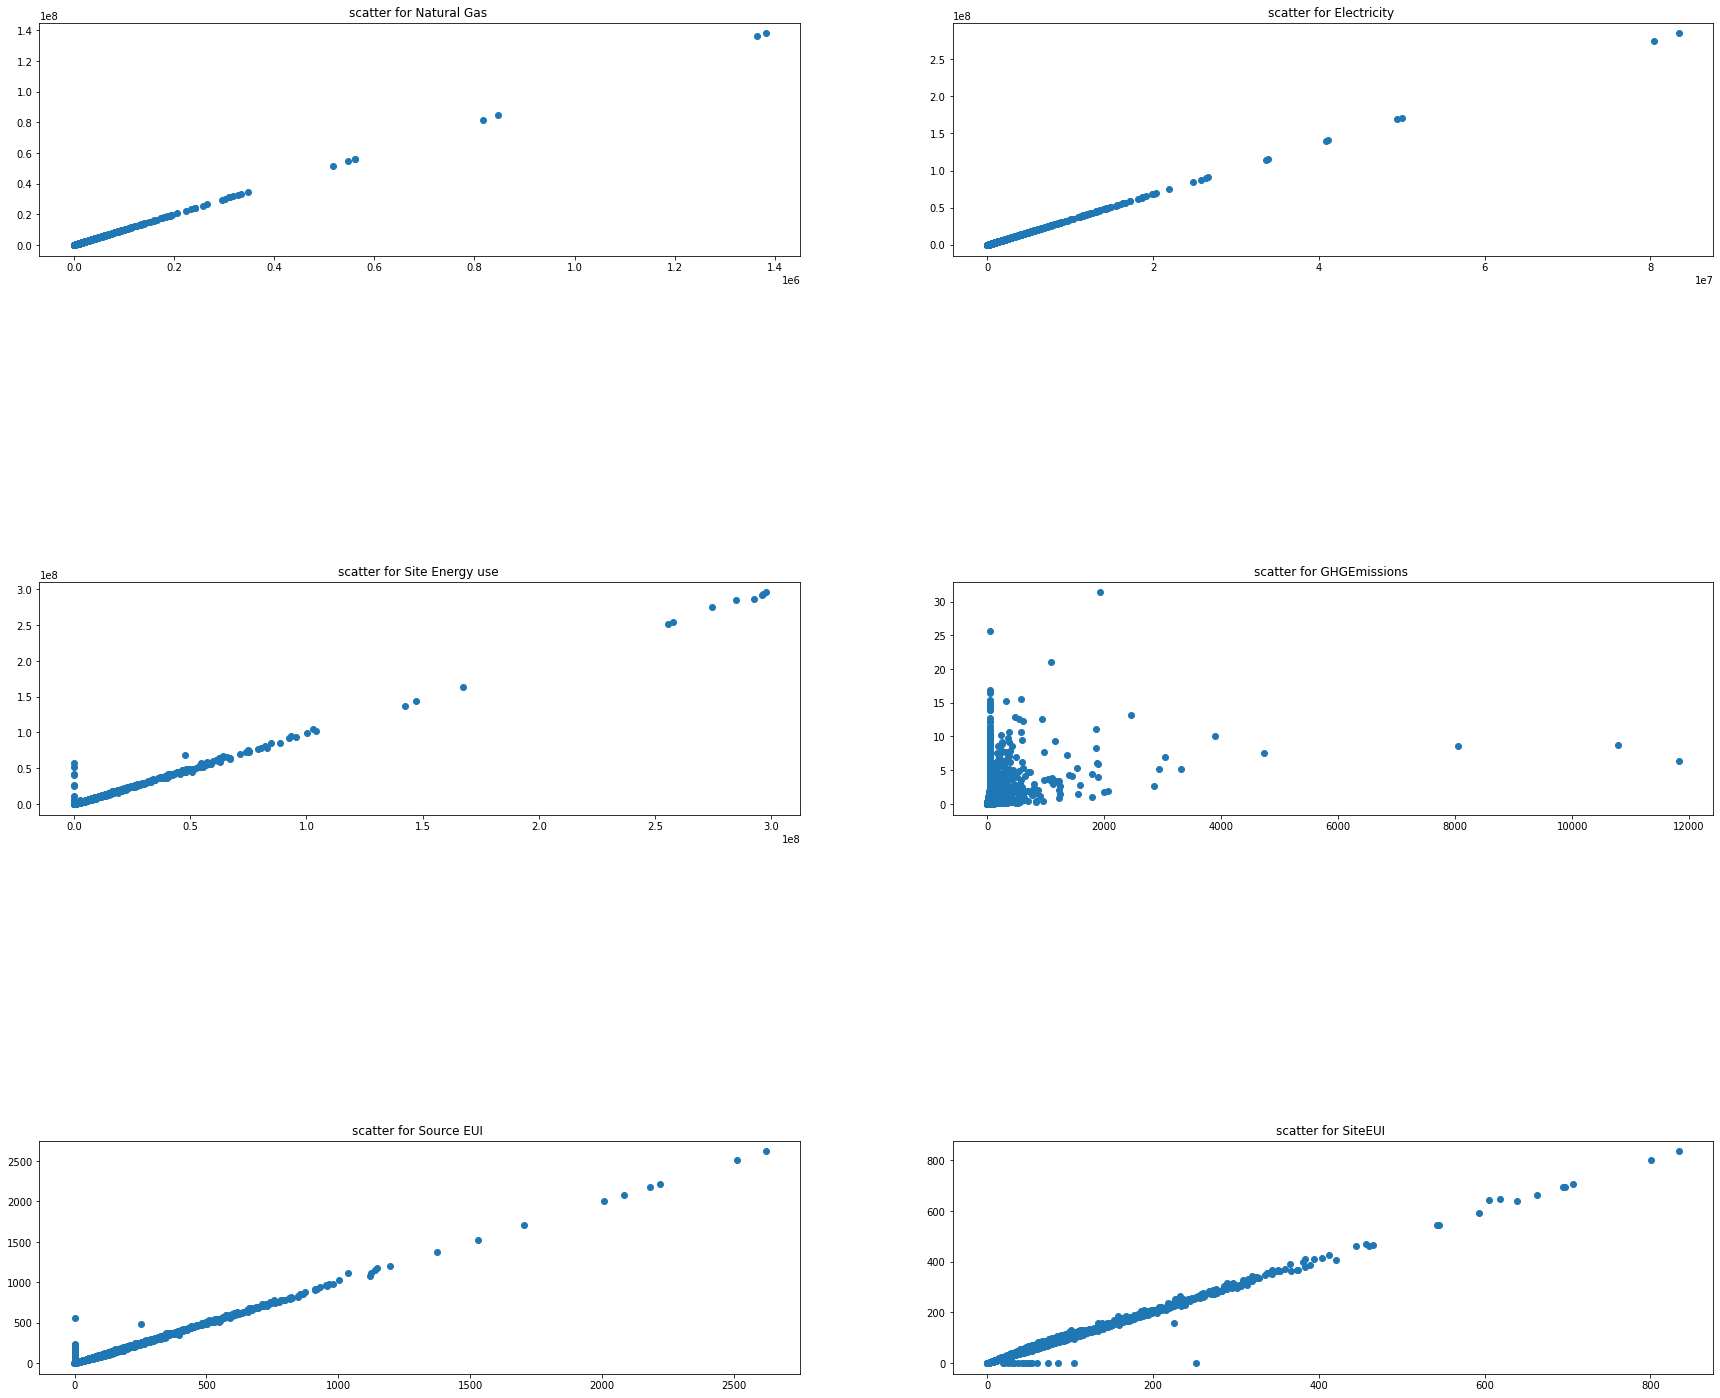

In [96]:
#removing highly correlated features 

fig = plt.figure( figsize = (30,30)) # create figure
ax0 = fig.add_subplot(6, 2, 1)
ax1 = fig.add_subplot(6,2,2)
ax3 = fig.add_subplot(6,2,5)
ax4 = fig.add_subplot(6,2,6)
ax5 = fig.add_subplot(6,2,9)
ax6 = fig.add_subplot(6,2,10)
                                                                                           

ax0.scatter(dfx_num['NaturalGas(therms)'], dfx_num['NaturalGas(kBtu)'])
ax1.scatter(dfx_num['Electricity(kWh)'], dfx_num['Electricity(kBtu)'])
ax3.scatter(dfx_num['SiteEnergyUseWN(kBtu)'], dfx_num['SiteEnergyUse(kBtu)'])
ax4.scatter(df_y['GHGEmissions(MetricTonsCO2e)'], df_y['GHGEmissionsIntensity(kgCO2e/ft2)'])
ax5.scatter(dfx_num['SourceEUIWN(kBtu/sf)'] , dfx_num['SourceEUI(kBtu/sf)'])
ax6.scatter(dfx_num['SiteEUI(kBtu/sf)'] , dfx_num['SiteEUIWN(kBtu/sf)'])

ax0.set_title('scatter for Natural Gas ')
ax1.set_title('scatter for Electricity ')
ax3.set_title('scatter for Site Energy use ')
ax4.set_title('scatter for GHGEmissions ')
ax5.set_title('scatter for Source EUI ')
ax6.set_title('scatter for SiteEUI ')

From the above plots: apart from ghgemissions , all are linear . thus we can drop the correlated features. we will keep the columns with unit kbtu as 'otherfuels' and 'SteamUse' have same unit . 

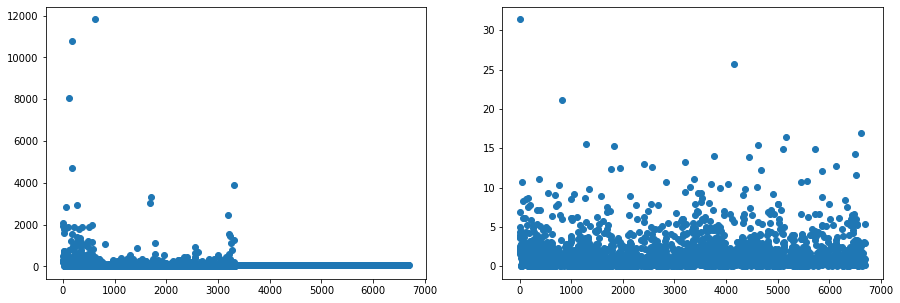

In [97]:
fig = plt.figure( figsize = (15,5)) # create figure

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1,2,2)


ax0.scatter(df_y.index , df_y['GHGEmissions(MetricTonsCO2e)'])
ax1.scatter(df_y.index , df_y['GHGEmissionsIntensity(kgCO2e/ft2)'])


In [98]:
dfx_num.drop(['SiteEUIWN(kBtu/sf)','NaturalGas(therms)','Electricity(kWh)','SiteEnergyUseWN(kBtu)' ,'SourceEUIWN(kBtu/sf)'],axis=1, inplace=True)

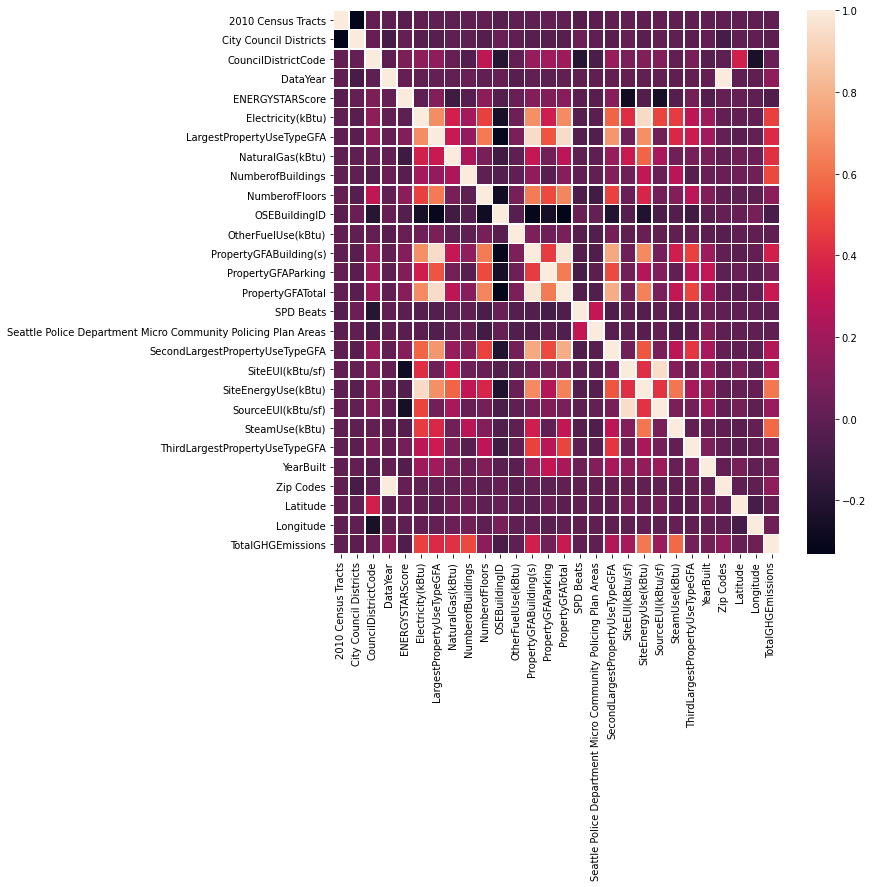

In [99]:
corr = dfx_num.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr , linewidths=.5 , annot_kws={"fontsize":15})

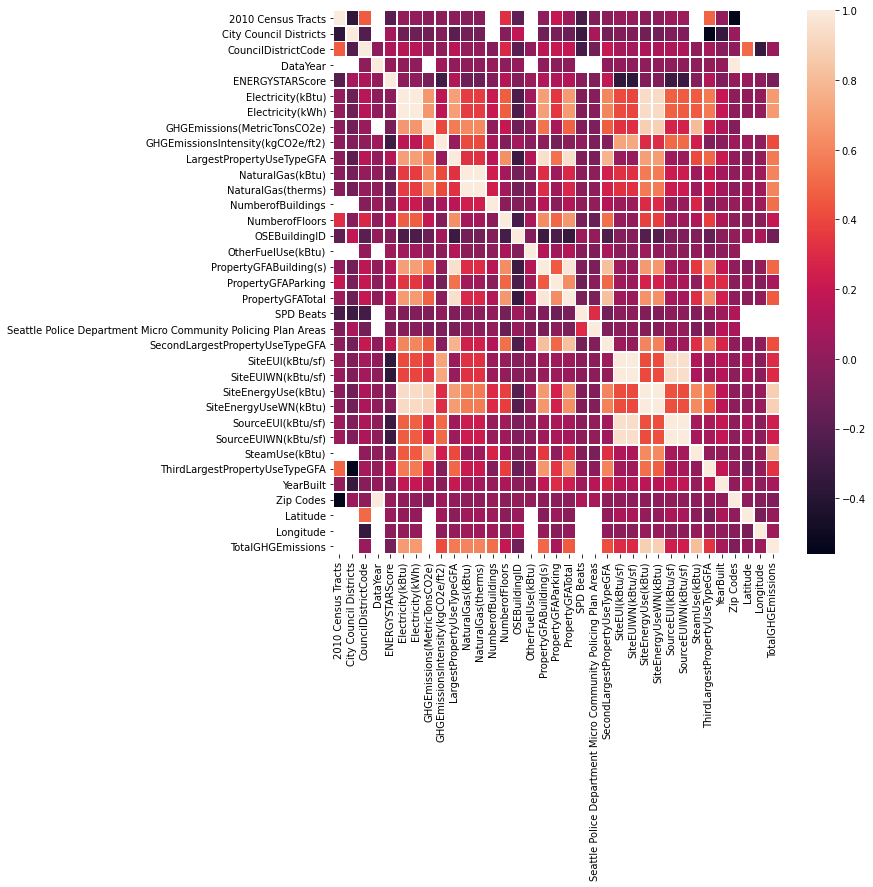

In [175]:
corr = df_num.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr , linewidths=.5 , annot_kws={"fontsize":15})
#GHGemissions are correlated with eletricity , largestproperty , propertygfabuilding , siteenergy , sourceeui

In [100]:
# we can drop the columns which have poor correlation
dfx_num.drop(['Zip Codes', 'Latitude','2010 Census Tracts', 'City Council Districts', 'CouncilDistrictCode','OSEBuildingID','SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas','Longitude'] , axis=1,inplace=True)

In [101]:
dfx_num[['LargestPropertyUseTypeGFA','PropertyGFABuilding(s)', 'PropertyGFAParking', 'PropertyGFATotal','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']].corr()

,LargestPropertyUseTypeGFA,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
LargestPropertyUseTypeGFA,1.000000,0.945064,0.525470,0.945954,0.714034,0.335700
PropertyGFABuilding(s),0.945064,1.000000,0.457853,0.977811,0.768045,0.479508
PropertyGFAParking,0.525470,0.457853,1.000000,0.633935,0.498181,0.275361
PropertyGFATotal,0.945954,0.977811,0.633935,1.000000,0.785531,0.482021
SecondLargestPropertyUseTypeGFA,0.714034,0.768045,0.498181,0.785531,1.000000,0.439920
ThirdLargestPropertyUseTypeGFA,0.335700,0.479508,0.275361,0.482021,0.439920,1.000000


PropertyGFATotal and PropertyGFABuilding(s) are highly correlated

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


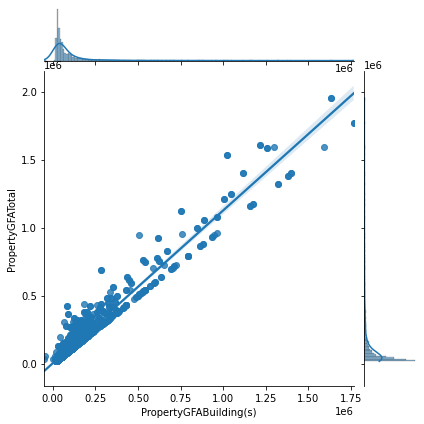

In [102]:
sns.jointplot(dfx_num['PropertyGFABuilding(s)'],dfx_num['PropertyGFATotal'] , kind='reg')

Thus we can drop propertyGFATotal

In [103]:
dfx_num.drop(['PropertyGFATotal'],axis=1,inplace=True)

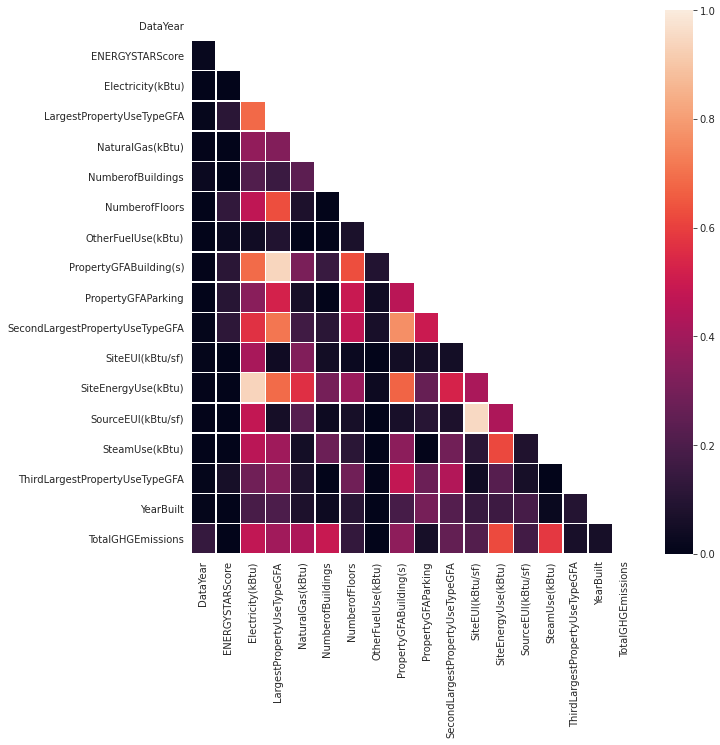

In [104]:
corr = dfx_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(corr, mask=mask ,vmin=0, vmax=1, linewidths=.5 , annot_kws={"fontsize":15})

we can see from the heatmap that :
SourceEUI and SiteEUI
SiteEnergyUse and Electricity 
PropertyGFABuilding and LargestPropertyUsetype
are highly correlated 

In [105]:
dfx_num.columns

Index(['DataYear', 'ENERGYSTARScore', 'Electricity(kBtu)',
       'LargestPropertyUseTypeGFA', 'NaturalGas(kBtu)', 'NumberofBuildings',
       'NumberofFloors', 'OtherFuelUse(kBtu)', 'PropertyGFABuilding(s)',
       'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA',
       'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SourceEUI(kBtu/sf)',
       'SteamUse(kBtu)', 'ThirdLargestPropertyUseTypeGFA', 'YearBuilt',
       'TotalGHGEmissions'],
      dtype='object')

In [106]:
dfx_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 6696
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         2921 non-null   int64  
 1   ENERGYSTARScore                  2921 non-null   float64
 2   Electricity(kBtu)                2921 non-null   float64
 3   LargestPropertyUseTypeGFA        2921 non-null   float64
 4   NaturalGas(kBtu)                 2921 non-null   float64
 5   NumberofBuildings                2921 non-null   float64
 6   NumberofFloors                   2921 non-null   float64
 7   OtherFuelUse(kBtu)               2921 non-null   float64
 8   PropertyGFABuilding(s)           2921 non-null   int64  
 9   PropertyGFAParking               2921 non-null   int64  
 10  SecondLargestPropertyUseTypeGFA  2921 non-null   float64
 11  SiteEUI(kBtu/sf)                 2921 non-null   float64
 12  SiteEnergyUse(kBtu) 

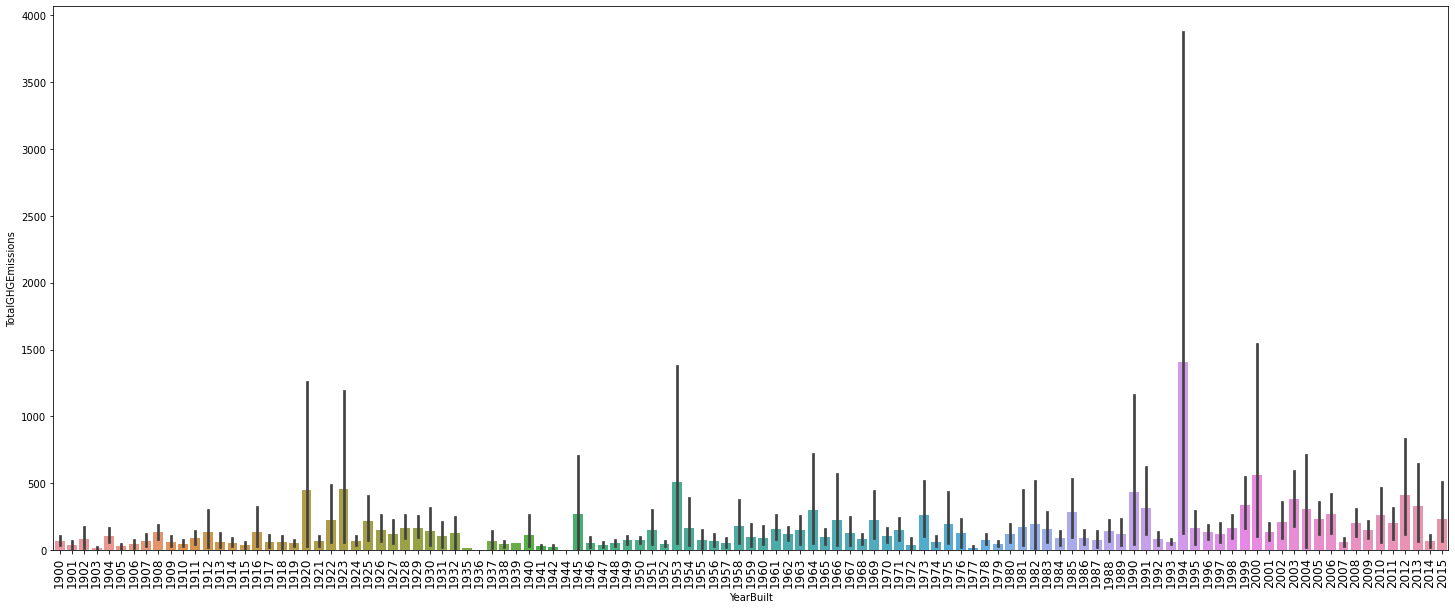

In [107]:
fig = plt.figure( figsize = (25,10))
plt.xticks(rotation=90 , fontsize= 12)
ax = sns.barplot(x=df['YearBuilt'] , y=df['TotalGHGEmissions'] )
# max emmissions in 1994

categorical data 

In [108]:
dfx_obj.describe()
dfx_obj.drop(['BuildingType','Comment','Location','PropertyName','TaxParcelIdentificationNumber','Address','City','State'],axis=1,inplace=True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [109]:
dfx_obj.isna().sum()

ComplianceStatus                   0
DefaultData                        1
LargestPropertyUseType            67
ListOfAllPropertyUseTypes         59
Neighborhood                       0
Outlier                         2877
PrimaryPropertyType                0
SecondLargestPropertyUseType    1362
ThirdLargestPropertyUseType     2304
YearsENERGYSTARCertified        2749
dtype: int64

In [110]:
#replace missing data 
for key in dfx_obj.columns:
     dfx_obj[key].fillna(dfx_obj[key].mode() , inplace = True)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

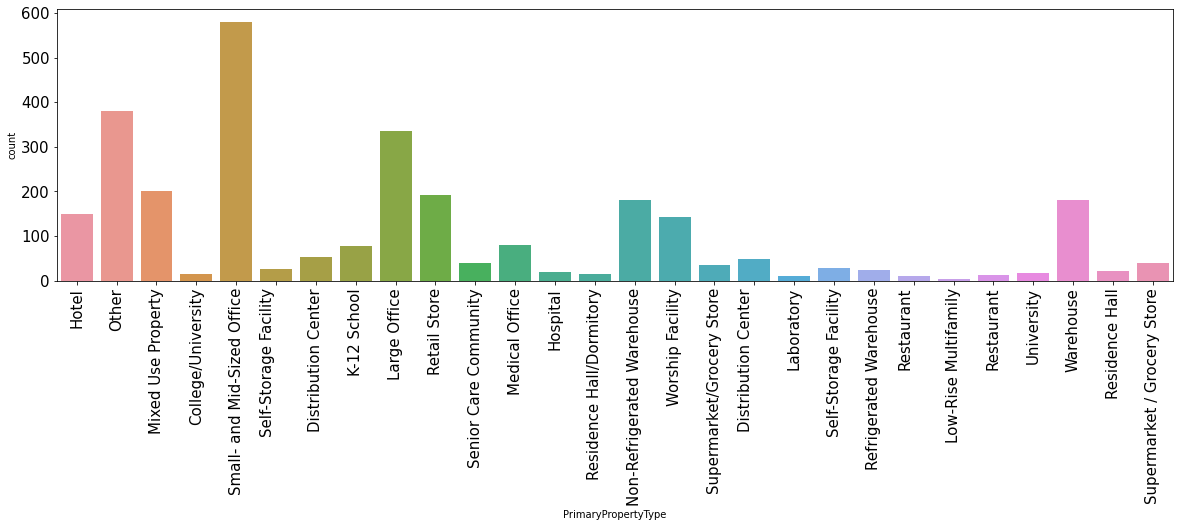

In [111]:
data1 =  dfx_obj['PrimaryPropertyType']
plt.figure(figsize=(20,5))
ax = sns.countplot( data1)    
plt.xticks(rotation=90 , fontsize = 15)
plt.yticks(fontsize = 15)


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

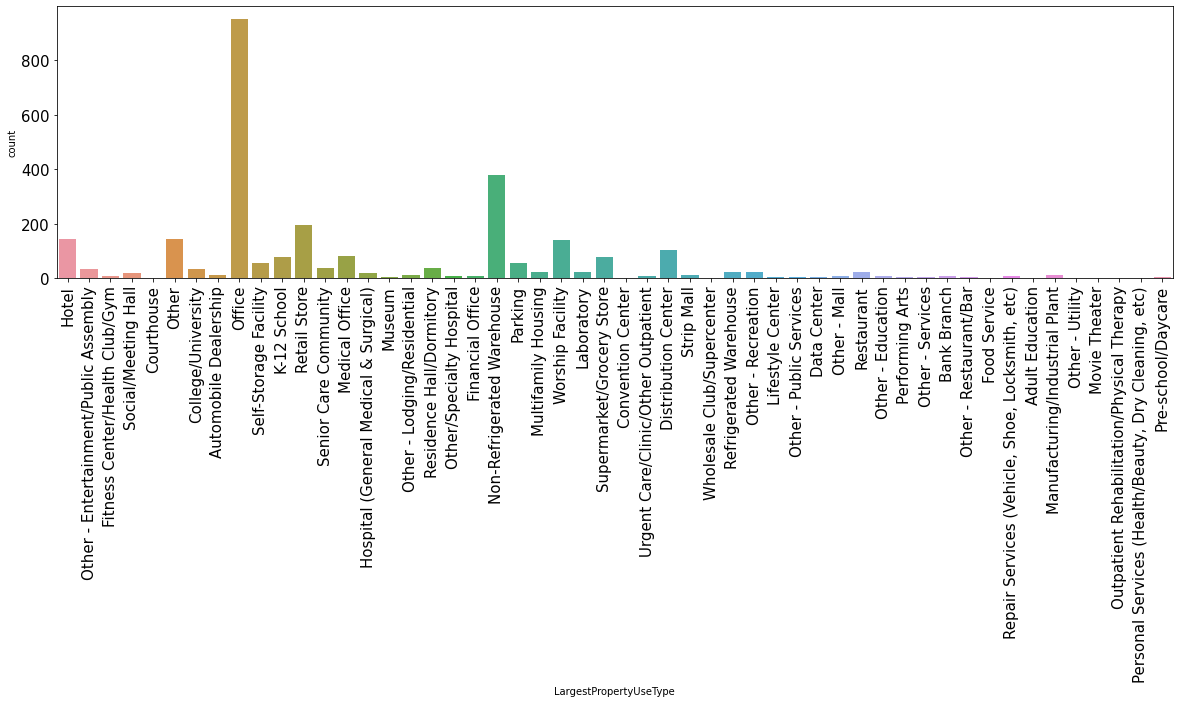

In [112]:
plt.figure(figsize=(20,5))
sns.countplot(dfx_obj['LargestPropertyUseType'])
plt.xticks(rotation=90 , fontsize = 15)
plt.yticks(fontsize = 15)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

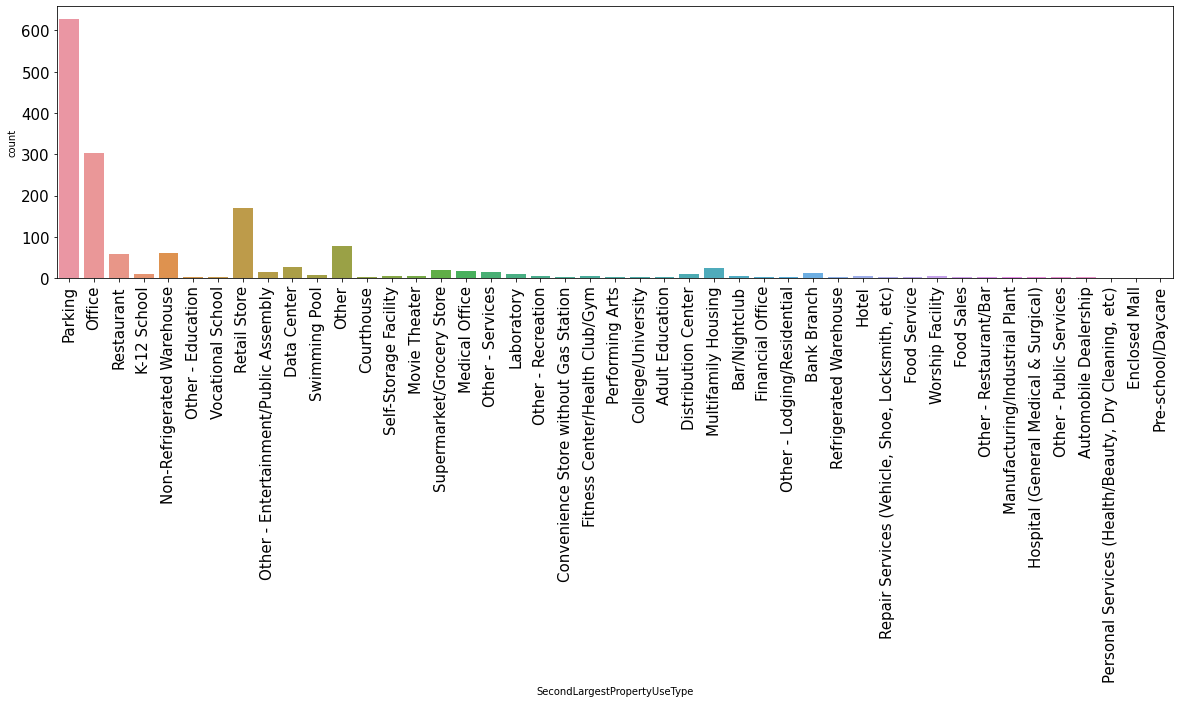

In [113]:
plt.figure(figsize=(20,5))
sns.countplot(dfx_obj['SecondLargestPropertyUseType'])
plt.xticks(rotation=90 , fontsize = 15)
plt.yticks(fontsize = 15)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

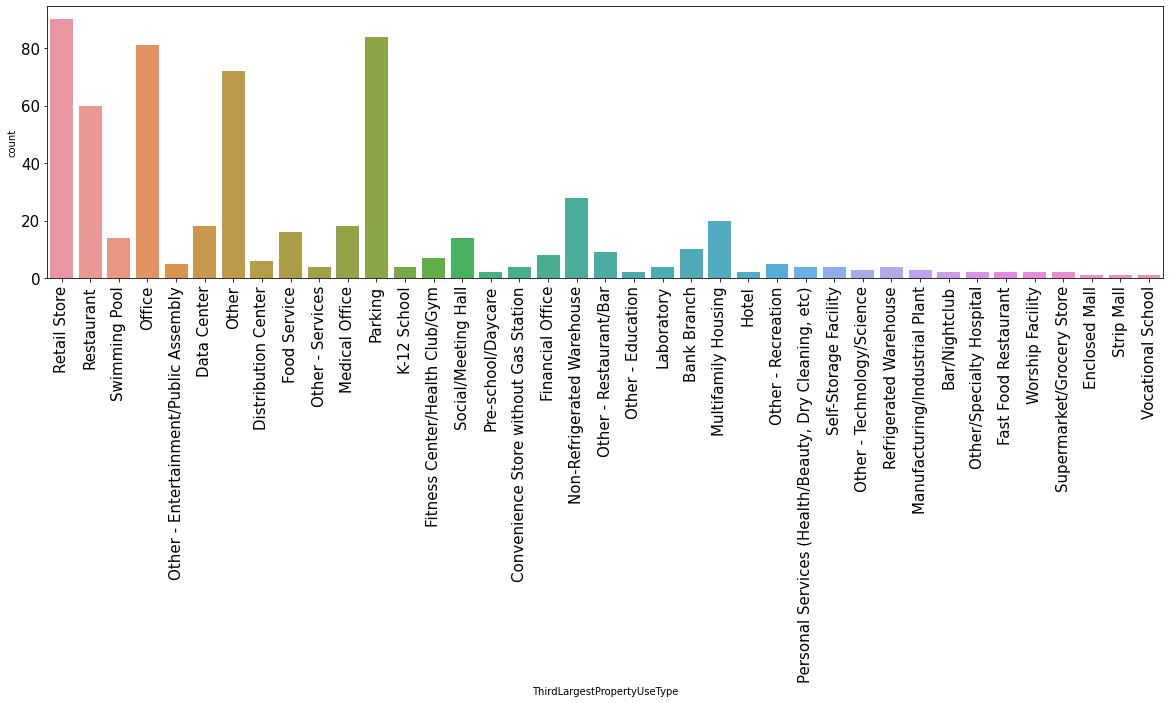

In [114]:
plt.figure(figsize=(20,5))
sns.countplot(dfx_obj['ThirdLargestPropertyUseType'])
plt.xticks(rotation=90 , fontsize = 15)
plt.yticks(fontsize = 15)

From these graphs we get to know about largest property types . 

<AxesSubplot:title={'center':'Energy Star Score for Every neighbourhood for the year 2016'}, xlabel='Neighborhood', ylabel='ENERGYSTARScore'>

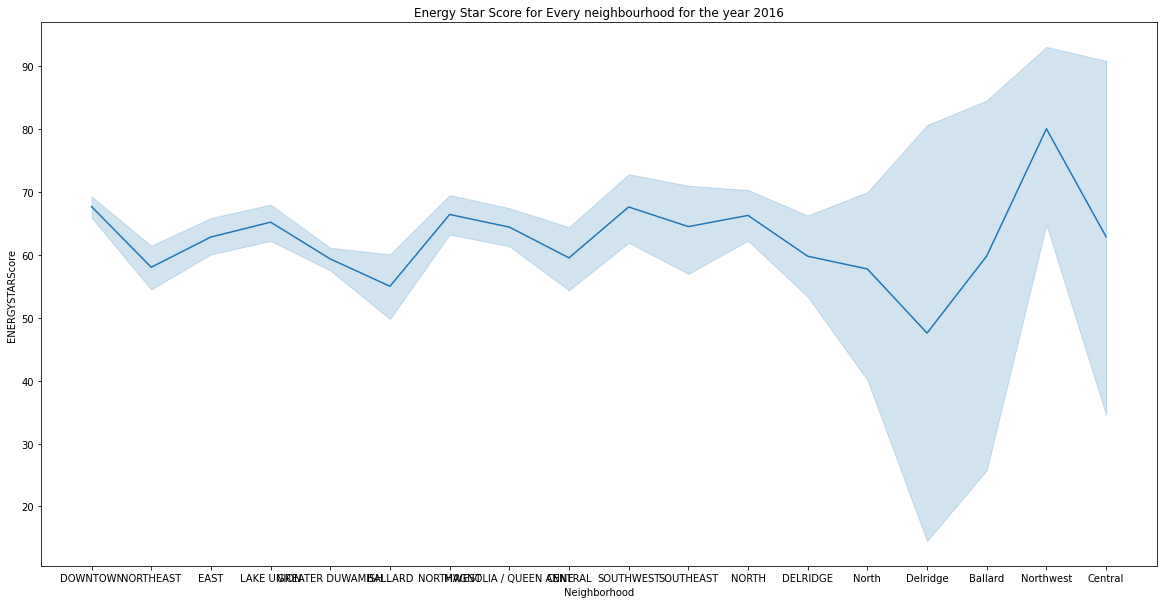

In [229]:
plt.figure(figsize=(20,10))
plt.title('Energy Star Score for Every neighbourhood for the year 2016')
sns.lineplot(x=dfx_obj['Neighborhood'],y=dfx_num['ENERGYSTARScore'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'DOWNTOWN'),
  Text(1, 0, 'NORTHEAST'),
  Text(2, 0, 'EAST'),
  Text(3, 0, 'LAKE UNION'),
  Text(4, 0, 'GREATER DUWAMISH'),
  Text(5, 0, 'BALLARD'),
  Text(6, 0, 'NORTHWEST'),
  Text(7, 0, 'MAGNOLIA / QUEEN ANNE'),
  Text(8, 0, 'CENTRAL'),
  Text(9, 0, 'SOUTHWEST'),
  Text(10, 0, 'SOUTHEAST'),
  Text(11, 0, 'NORTH'),
  Text(12, 0, 'DELRIDGE'),
  Text(13, 0, 'North'),
  Text(14, 0, 'Delridge'),
  Text(15, 0, 'Ballard'),
  Text(16, 0, 'Northwest'),
  Text(17, 0, 'Central')])

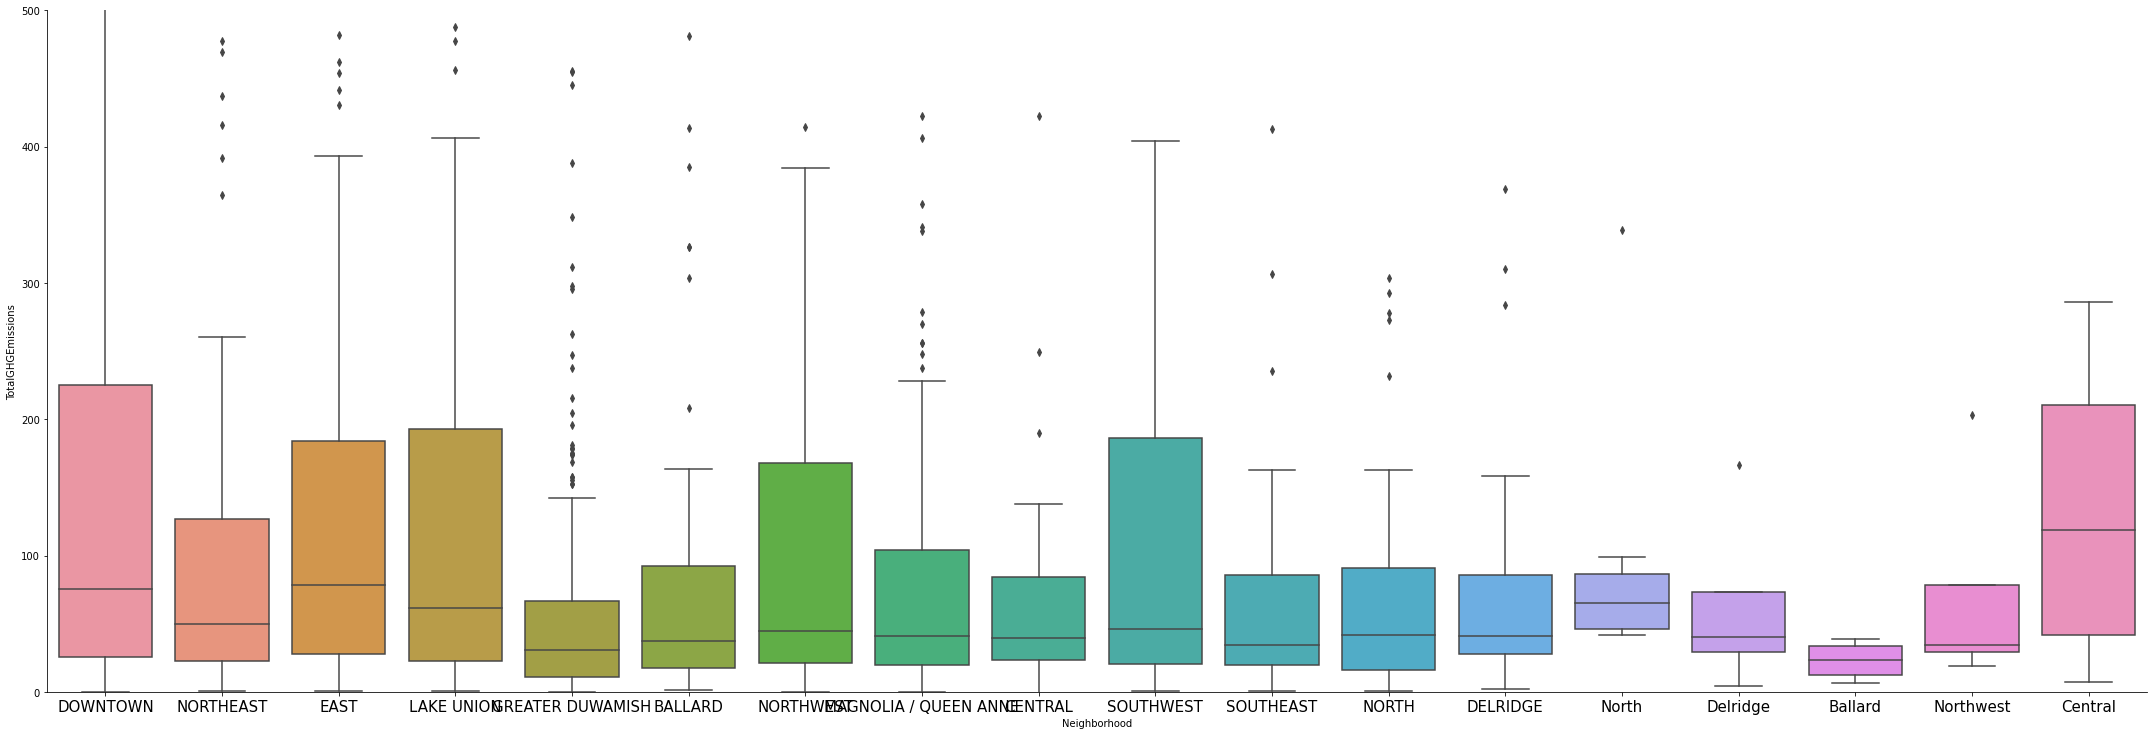

In [224]:
sns.catplot(x='Neighborhood', y='TotalGHGEmissions', data=df ,height=10, aspect=3, kind='box')
plt.ylim(0,500)
plt.xticks(fontsize = 15)

<AxesSubplot:xlabel='features', ylabel='value'>

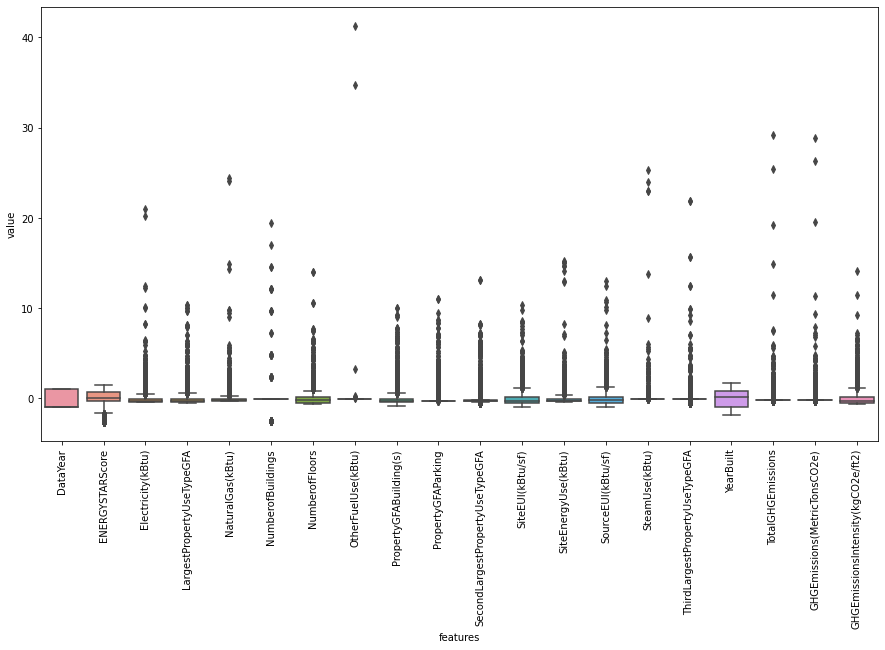

In [117]:
#remove outliers
grp1 = pd.concat([dfx_num,df_y],ignore_index=True)
grp1 = (grp1 - grp1.mean())/(grp1.std()) 
data = pd.melt(grp1,var_name="features",value_name='value')
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90)
sns.boxplot(x="features", y = 'value' , data=data , ax=ax)


# we can see from the box plot there are outliers present in the data


In [118]:
#Q1 = grp1.quantile(0.25)
#Q3= grp1.quantile(0.75)
#IQR = Q3-Q1
#grp1 = grp1[~(( grp1 < (Q1 - 1.5 * IQR)) |( grp1 > (Q3 + 1.5 * IQR))).any(axis=1)]



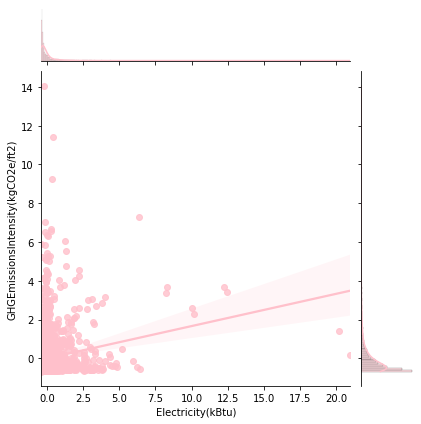

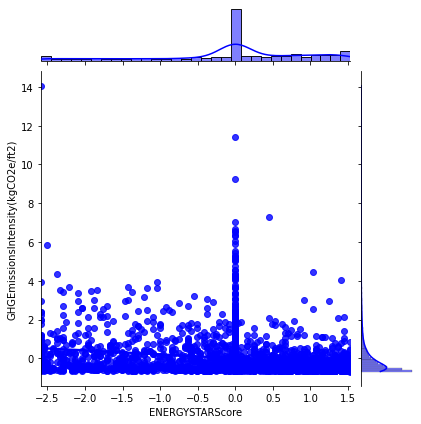

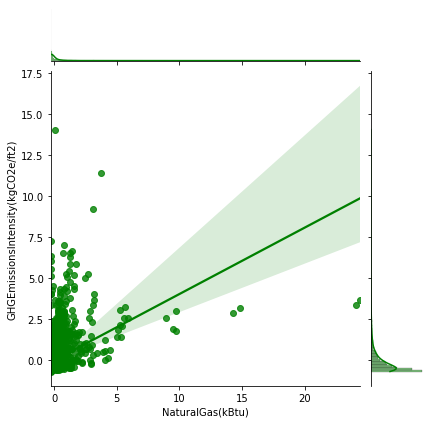

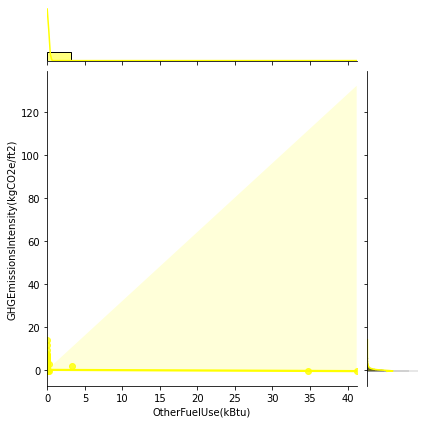

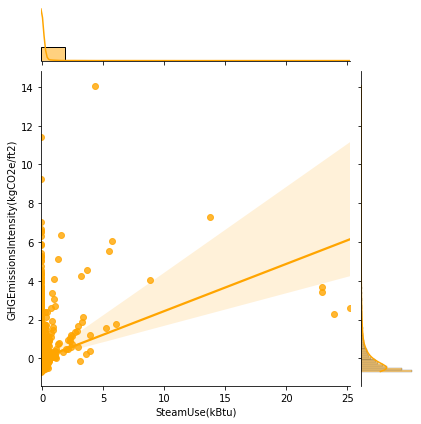

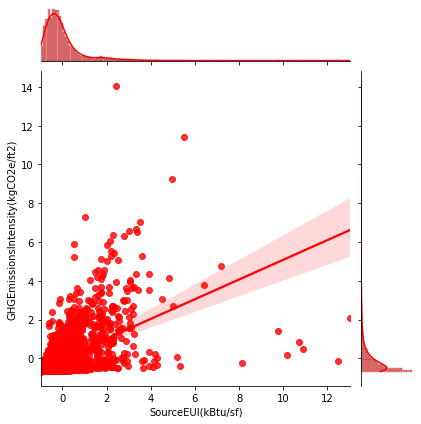

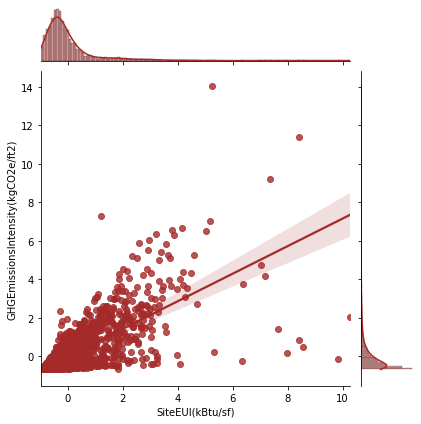

In [119]:
#regplot 

grp1 = dfx_num
grp1 = (grp1 - grp1.mean())/(grp1.std()) 
grp2 = df_y
grp2 = (grp2 - grp2.mean())/(grp2.std()) 
#'SiteEnergyUse(kBtu)' and Electricity are highly correlated
ax1 = sns.jointplot(x = grp1['Electricity(kBtu)'],y = grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='pink', kind ="reg")

ax2 = sns.jointplot(x = grp1['ENERGYSTARScore'],y = grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='blue', kind ="reg")

ax3 = sns.jointplot(x = grp1['NaturalGas(kBtu)'],y= grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='green', kind ="reg")

ax4 = sns.jointplot(x= grp1['OtherFuelUse(kBtu)'],y= grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='yellow', kind ="reg")


ax5 = sns.jointplot(x= grp1['SteamUse(kBtu)'],y=  grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='orange', kind ="reg")


ax6 = sns.jointplot(x= grp1['SourceEUI(kBtu/sf)'],y= grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='red',kind ="reg")


ax7 = sns.jointplot(x= grp1['SiteEUI(kBtu/sf)'],y=grp2['GHGEmissionsIntensity(kgCO2e/ft2)'],color='brown',kind ="reg")



In [154]:
# import
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# multiple reg fit  

In [155]:
#preprocessing
X = np.asarray(dfx_num)
Y = np.asarray(df_y)
X = preprocessing.StandardScaler().fit(X).transform(X)

In [156]:
#train
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
lm = LinearRegression().fit(X_train,Y_train)


Train set: (2336, 18) (2336, 2)
Test set: (585, 18) (585, 2)


In [157]:
#predict
yhat = lm.predict(X_test)

In [158]:
#lm.intercept_
#lm.coef_

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


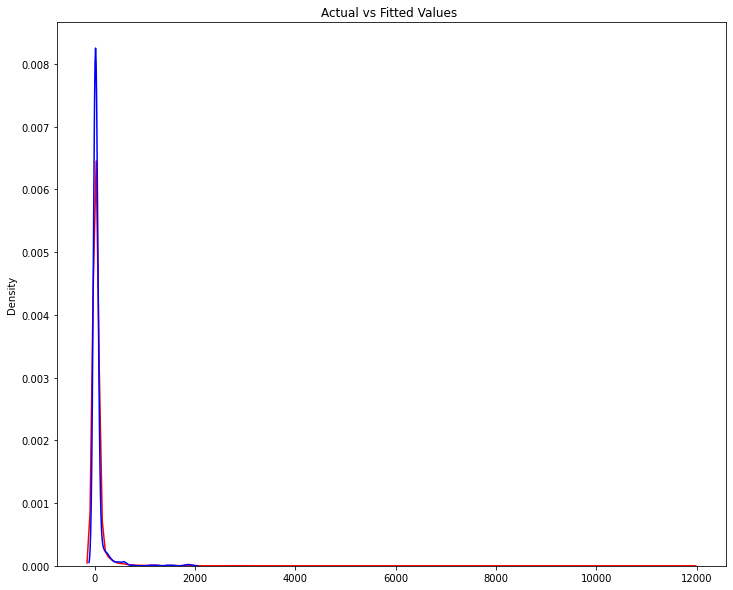

In [159]:
plt.figure(figsize=( 12, 10))


ax1 = sns.distplot(df_y, hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ')

plt.show()
plt.close()

In [160]:
# scores 

In [161]:
lm.score(X_train,Y_train)

0.9519232936248005

In [162]:
lm.score(X_test,Y_test)

0.9262637596603657

In [168]:
yhat2 = cross_val_predict(lm,dfx_num , df_y, cv=10)
Rc=cross_val_score(lm,dfx_num , df_y, cv=10)
-1 * cross_val_score(lm,dfx_num , df_y, cv=50,scoring='neg_mean_squared_error')

array([1.23282184, 0.10919922, 0.06477237, 0.18360459, 0.37510743,
       0.07982974, 0.07803011, 0.07686382, 0.34179517, 1.16295958,
       0.03461156, 0.21678419, 0.0525436 , 0.34660753, 0.12973609,
       0.05858511, 0.2211311 , 0.01250013, 0.02032105, 0.15114462,
       1.51540797, 0.10672311, 0.16068188, 0.05434757, 0.32762095,
       0.17879581, 0.17991525, 0.05609166, 0.18617092, 0.352321  ,
       0.06340659, 0.11395775, 1.85204641, 2.91094576, 0.11296815,
       0.05763279, 0.14630028, 0.05777087, 0.48803539, 0.1249515 ,
       0.06649252, 0.26800704, 0.00765594, 0.03667217, 0.22160086,
       0.19998336, 1.79466726, 0.3652939 , 0.35550489, 2.98164075])

In [169]:
Rc

array([ 9.41522361e-01,  9.17715423e-01,  9.32601292e-01,  9.75625288e-01,
        9.64192368e-01, -4.72069555e+24, -6.71923458e+27, -8.65983532e+24,
       -8.79593093e+24, -6.71814327e+27])

In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, yhat))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, yhat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, yhat)))

Mean Absolute Error: 0.1670101853602323
Mean Squared Error: 0.534162453894112
Root Mean Squared Error: 0.7308641829328565


""""

from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train)
x_test_pr=pr.fit_transform(X_test)
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, Y_train)

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', Y_test[0:4])

"""""